In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

In [59]:
df=pd.read_csv('american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [60]:
df=df.drop(columns=['company_name','year'])

In [61]:
df.head()

,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,alive,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,alive,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,alive,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,alive,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,alive,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  78682 non-null  object 
 1   X1            78682 non-null  float64
 2   X2            78682 non-null  float64
 3   X3            78682 non-null  float64
 4   X4            78682 non-null  float64
 5   X5            78682 non-null  float64
 6   X6            78682 non-null  float64
 7   X7            78682 non-null  float64
 8   X8            78682 non-null  float64
 9   X9            78682 non-null  float64
 10  X10           78682 non-null  float64
 11  X11           78682 non-null  float64
 12  X12           78682 non-null  float64
 13  X13           78682 non-null  float64
 14  X14           78682 non-null  float64
 15  X15           78682 non-null  float64
 16  X16           78682 non-null  float64
 17  X17           78682 non-null  float64
 18  X18           78682 non-nu

In [63]:
df.shape

(78682, 19)

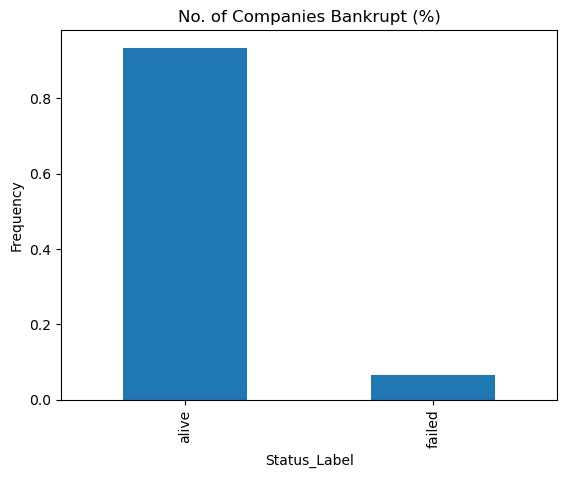

In [64]:
df['status_label'].value_counts(normalize=True).plot(kind='bar',xlabel='Status_Label', ylabel='Frequency', title='No. of Companies Bankrupt (%)');

# Model 1
# Logistic Regression

In [66]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
          'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']]
y = df['status_label'].map({'alive': 1, 'failed': 0})

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [70]:
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

In [71]:
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy,4))

0.9335


In [72]:
precision = precision_score(y_test, y_pred,average=None)
print(precision[1])

0.9342029907731467


In [73]:
recall = recall_score(y_test, y_pred,average=None)
print(recall[1])

0.9991832845572721


In [74]:
f1 = f1_score(y_test, y_pred,average=None)
print(f1[1])

0.9656011575901079


In [75]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(roc_auc)

0.6578262826435191


In [76]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.01      0.02      1044
           1       0.93      1.00      0.97     14693

    accuracy                           0.93     15737
   macro avg       0.69      0.50      0.49     15737
weighted avg       0.90      0.93      0.90     15737



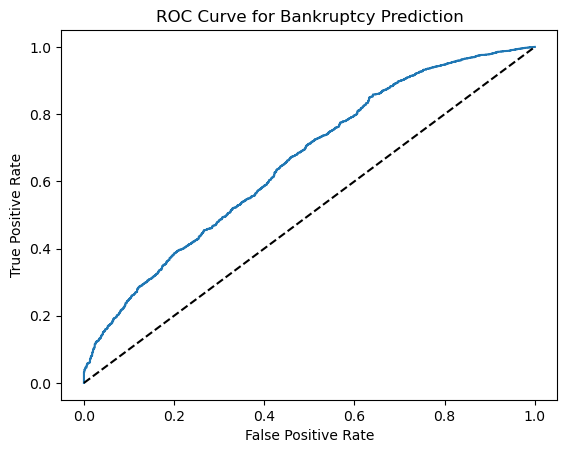

In [77]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='dashed',color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bankruptcy Prediction')
plt.show()

In [78]:
feature_names = X.columns
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

print('\nFeature Importance:')
print(feature_importance)


Feature Importance:
   Feature  Coefficient
7       X8     2.676873
0       X1     1.554547
9      X10     0.428902
11     X12     0.326475
3       X4     0.164684
6       X7     0.107630
12     X13     0.086308
5       X6     0.057768
14     X15     0.057511
8       X9     0.021861
15     X16     0.021861
1       X2    -0.006819
17     X18    -0.007177
10     X11    -0.242706
2       X3    -0.247969
4       X5    -0.488963
13     X14    -0.640470
16     X17    -0.882914


In [79]:
feat_imp = pd.Series(coefficients, feature_names).sort_values()

In [80]:
print(feat_imp)

X17   -0.882914
X14   -0.640470
X5    -0.488963
X3    -0.247969
X11   -0.242706
X18   -0.007177
X2    -0.006819
X16    0.021861
X9     0.021861
X15    0.057511
X6     0.057768
X13    0.086308
X7     0.107630
X4     0.164684
X12    0.326475
X10    0.428902
X1     1.554547
X8     2.676873
dtype: float64


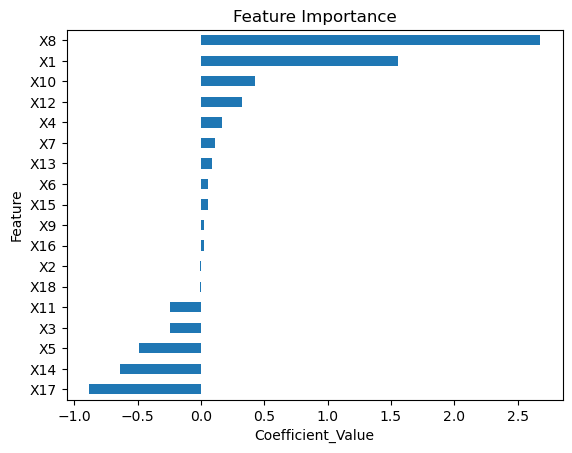

In [81]:
feat_imp.plot(kind='barh')
plt.xlabel("Coefficient_Value")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()